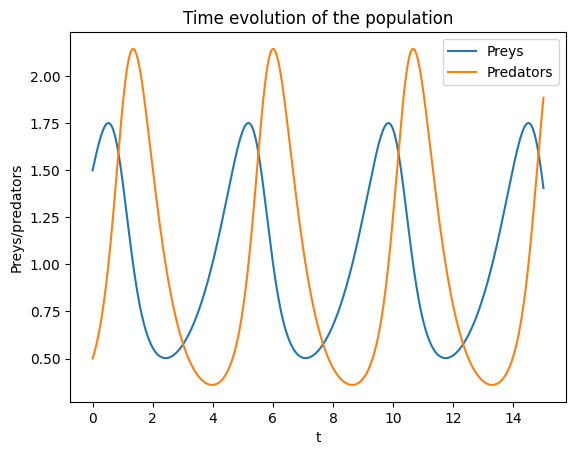

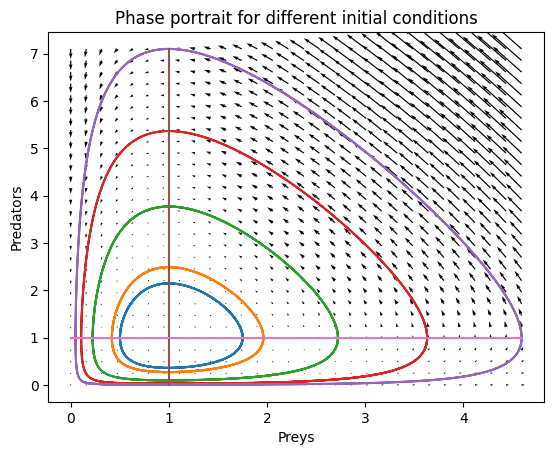

In [1]:
######## Non-dimensional Lotka-Volterra predator-prey model ########
######## Adam Ouzeri - November 2023 ########

######## Imports ########
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

######## Fonction definition ########
def lotkavolterraAdim(t, z, alpha):
    u, v = z
    return [u*(1 - v), alpha*v*(u - 1)]


######## Simulation parameters ########
alpha = 2.0
tspan = [0.0, 15.0]
y0 = [1.5, 0.5]
t = np.linspace(tspan[0], tspan[1], 10000)

######## Solving the system ########
sol = solve_ivp(lotkavolterraAdim, tspan, y0,  args=(alpha,), t_eval = t, rtol = 1e-6)

######## Post-processing ########
# Time evolution of preys and predator
plt.plot(t, sol.y.T)
plt.xlabel('t')
plt.ylabel('Preys/predators')
plt.legend(['Preys', 'Predators'])
plt.title('Time evolution of the population')
plt.show()

## Phase portrait ##
m = 0 # to plot vector field
n = 0 # to plot vector field

# Plotting orbits
for i in reversed(np.logspace(-1,0,5)):
    sol = solve_ivp(lotkavolterraAdim, tspan, np.dot(i,y0),  args=(alpha,), t_eval = t, rtol = 1e-6)
    m = max(m,max(sol.y[0,:]))
    n = max(n,max(sol.y[1,:]))
    plt.plot(sol.y[0,:], sol.y[1,:])

plt.xlabel('Preys')
plt.ylabel('Predators')
plt.title('Phase portrait for different initial conditions')

# Vector field
U,V = np.meshgrid(np.linspace(0,m,30),np.linspace(0,n,30))
DU, DV = lotkavolterraAdim(t, [U,V], alpha)
plt.quiver(U,V,DU,DV, angles = 'xy')

# Nullclines
x = np.linspace(0,m,10)
y = np.linspace(0,n,10)
plt.plot(np.ones(10),y)
plt.plot(x,np.ones(10))

plt.show()